In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from google.colab import drive
# drive.mount("/content/drive")

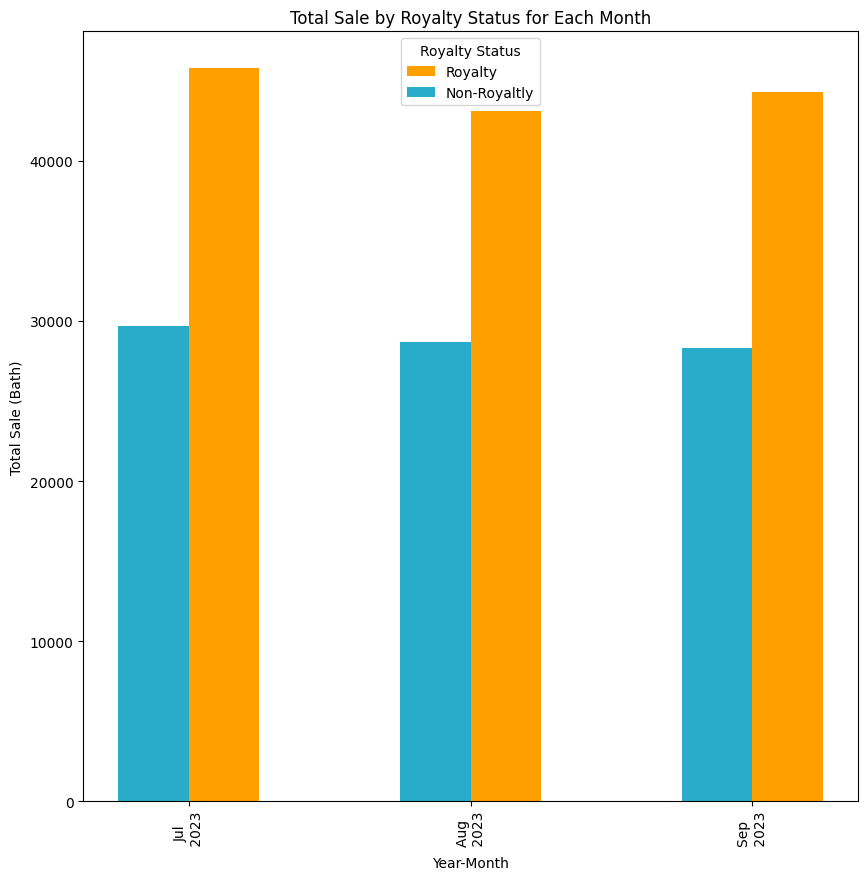

In [8]:
# ---
# Group No. 5
# 1. นาย พุฒิพงศ์ ขำสุวรรณ 6410450559
# 2. นาย ธนสาร วิริยะสุนทรวงศ์ 6410450460
# 3. นาย ศรัณย์ ธราพร 6410451857
# 4.
# ---

group = 5 # อย่าลืมเปลี่ยนเลขกลุ่ม
problem = 6 # ปัญหาที่
data_num = 5 # ชุดข้อมูลที่

# ชุดข้อมูลเก็บใน /in
in_path = "./dataset/P"+str(problem)+"/in/"
data_path = in_path+"p"+str(problem)+"_input_dataset_"+str(data_num)+".csv"

# ผลลัพธ์เก็บใน /out
out_path = "./dataset/P"+str(problem)+"/out/"
result_path = out_path+"p"+str(problem)+"_group"+str(group)+"-output"+str(data_num)+".csv"
png_path = out_path+"p"+str(problem)+"_group"+str(group)+"-plot"+str(data_num)+".png"

# อ่านข้อมูล
data = pd.read_csv(data_path)

# --- เริ่มเขียนโค้ดตรงนี้ ---
# แปลงคอลัมน์ 'date' เป็นรูปแบบวันที่และเวลา
data['date'] = pd.to_datetime(data['date'], format='%Y/%m/%d')

# กลุ่มข้อมูลตามปี ด เดือน และสถานะการมีบัตรสมาชิก
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['has_membership'] = data['royalty_number'] != ' '
data = data.groupby(['year', 'month', 'has_membership'])['total_sale'].sum().reset_index()

# เปลี่ยนชื่อคอลัมน์ 'has_membership' เป็น royalty_number และกำหนด boolean โดยแยกระหว่างมี Membership = True ไม่มี Membership = False
data['royalty_number'] = data['has_membership'].map({True: 'TRUE', False: 'FALSE'})
data = data[['year', 'month','royalty_number' , 'total_sale']]

# สร้างแผนภูมิแท่งเปรียบเทียบ
plt.figure(figsize=(10, 10))
width = 0.5

# กำหนดตำแหน่งแท่งของข้อมูลมี Membershipและไม่มี Membership
royalty = data[data['royalty_number'] == 'TRUE']
non_royalty = data[data['royalty_number'] == 'FALSE']

# สร้างแท่งข้อมูลมี Membership
plt.bar(royalty.index, royalty['total_sale'], width, label='Royalty',color='#FF9F00')

# สร้างแท่งข้อมูลไม่มี Membership
plt.bar(non_royalty.index + width, non_royalty['total_sale'], width, label='Non-Royaltly',color='#29ABCA')

# ปรับแต่งแกน x เป็นชื่อเดือน+ปี
months = ['Jan \n 2023', 'Feb \n 2023', 'Mar \n 2023', 'Apr \n 2023', 'May \n 2023', 'Jun \n 2023', 'Jul \n 2023', 'Aug \n 2023', 'Sep \n 2023', 'Oct \n 2023', 'Nov \n 2023', 'Dec \n 2023']

plt.xticks([0.75, 2.75, 4.75], [f'{months[month - 1]}' for month in [7, 8, 9]], rotation=90)

# ปรับแต่งแกน y
plt.ylabel('Total Sale (Bath)')
plt.xlabel('Year-Month')

# ตั้งชื่อแผนภูมิ
plt.title('Total Sale by Royalty Status for Each Month')

# เพิ่มคำอธิบายแผนภูมิ
plt.legend(title='Royalty Status')

# --- สิ้นสุดโค้ดตรงนี้ ---

# เซฟผลลัพธ์
data.to_csv(result_path, index=False)

# แสดงผลลัพธ์
data.head()

# เซฟกราฟ
plt.savefig(png_path, dpi=100)

# แสดงผลกราฟ
plt.show()